# Project: Wrangling and Analyze Data

In [18]:
!pip install tweepy

     -------------------------------------- 98.5/98.5 kB 472.1 kB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 1.0 MB/s eta 0:00:00


In [297]:
import pandas as pd
import numpy as np
import requests 
import io
import tweepy
import json
import re
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [183]:
tweets_arhv = pd.read_csv("twitter-archive-enhanced.csv")

In [184]:
tweets_arhv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [185]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [186]:
img_prdc = pd.read_csv(io.StringIO(response.content.decode('utf-8')), sep='\t')

In [187]:
img_prdc.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [188]:
consumer_key = 'LRz11QrEcWeh3z6zyhmsuzWJJ'
consumer_secret = 'aP9VSzasZuO7Hn2EM4M35wRGEk7xWQww2gGrcTVbvxlkwnDMD2'
access_token = '1667119160248225795-IlcKqrq4FOxsFYdH1a9fbwvpRCCTmg'
access_secret = 'XuSA2xZR2V0oSPgo8O7mAfj3BLair3crZdgxN7ng5pQY9'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [189]:
tweet_ids = tweets_arhv['tweet_id'].tolist()
tweet_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [34]:
with open('tweet_json.txt', 'w') as file_Json_output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file_Json_output)
            Json_file.write('\n')
            #print(f"Tweet ID: {tweet_id} - Success")
            print("Tweet ID: {}  Done!".format(tweet_id))
        except Exception as e:
            #print(f"Tweet ID: {tweet_id} - Error: {e}")
            print("Tweet ID: {}  - Error  {} ".format(tweet_id,e))

Tweet ID: 892420643555336193  - Error  403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product 
Tweet ID: 892177421306343426  - Error  403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product 
Tweet ID: 891815181378084864  - Error  403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product 
T

Tweet ID: 887101392804085760  - Error  403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product 
Tweet ID: 886983233522544640  - Error  403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product 
Tweet ID: 886736880519319552  - Error  403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product 
T

KeyboardInterrupt: 

I Faced some issues with retrieve the retweets and favorite counts for tweets,so I used tweet_json.txt that downloaded on Udacity website.

In [10]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)


with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [11]:
retrieved_data = []
with open('tweet-json.txt', 'r') as file:
    records = file.readlines()
    for record in records:
        json_loaded_file = json.loads(record)
        retrieved_data.append({'tweet_id': json_loaded_file['id'],
                        'retweet_count': json_loaded_file['retweet_count'],
                        'favorite_count': json_loaded_file['favorite_count']})
        
tweet_json = pd.DataFrame(retrieved_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [50]:
tweets_arhv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
tweets_arhv.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
tweets_arhv.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [15]:
tweets_arhv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [80]:
tweets_arhv.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
tweets_arhv[tweets_arhv['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [19]:
tweets_arhv[tweets_arhv['rating_numerator']>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [25]:
img_prdc[(img_prdc['p1_dog'] | img_prdc['p2_dog'] | img_prdc['p3_dog']) == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### Quality issues
>tweets_arhv

1.timestamp stored as string not date and added by '+0000'

2.We need the original rating not retweets and replies (need to remove all the following columns:in_reply_to_status_id,in_reply_to_uesr_id,retweeted_status_id,retweeted_user_id,retweeted_status_timestamp )

3.The source column is not readable,We can remove the html tags to be easy to read the source of the tweet

4.There is some rows that have rating_numerator with large numbers (e.g. In row 2074 the rating_numerator is 420 out of 10 !!)

5.There is some rows that have rating_denominator grater than 10 

6.After drop the rows that have rating_denominator!=10,We can drop column rating_denominator and rename the column rating_numerator to "rating_dog".We now the rating is out of 10 Now.

7.rename 'timestamp' to 'tweet_timestamp'

8.rename 'text' ot 'tweet_text'

9.Some of the tweets that the img_prdc classifies as images of dogs are not dogs, so based on that, we will remove the tweets that are not dogs.

>Img_prdc

10.In img_prdc, there are three algorithms to predict the breed of dogs. We can take the maximum one between p1_conf, p2_conf, and p3_conf and the type of breed that comes with the maximum of them and drop the other reslut algorthim.

### Tidiness issues
1.The doggo,floofer,pupper and puppo can be in one columns called "dog_stage"

2.There are Three tables: tweets_arhv,img_pdct and tweet_json. We need to merge all of these tables together.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [190]:
# Make copies of original pieces of data
tweets_arhv_copy = tweets_arhv
img_prdc_copy = img_prdc
tweet_json_copy = tweet_json

### Issue #1: timestamp stored as string not date and added by '+0000'

#### Define: 
In tweets_arhv the timestamp stored as string not date and added by '+0000', we need to remove the '+0000' from the dates and convert is to date type

#### Code

In [191]:
tweets_arhv_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [192]:
tweets_arhv_copy.timestamp= tweets_arhv_copy.timestamp.apply(lambda x: x[:-6])

In [193]:
tweets_arhv_copy.timestamp = pd.to_datetime(tweets_arhv_copy['timestamp'])

#### Test

In [194]:
tweets_arhv_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [195]:
tweets_arhv_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2: We need the original rating not retweets and replies

#### Define
We need the original rating not retweets and replies (need to remove all the following columns:in_reply_to_status_id,in_reply_to_uesr_id,retweeted_status_id,retweeted_user_id,retweeted_status_timestamp )

#### Code

In [196]:
tweets_arhv_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [197]:
tweets_arhv_copy = tweets_arhv_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)


#### Test

In [198]:
tweets_arhv_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3: The source column is not readable.


#### Define
The source column is not readable,We can remove the html tags to be easy to read the source of the tweet


In [199]:
tweets_arhv_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Code

In [200]:
def extract_source(text):
    source = re.search('>(.*?)<', text)
    if source:
        return source.group().replace('>','').replace('<','')
    

In [201]:
tweets_arhv_copy.source = tweets_arhv_copy.source.apply(extract_source)

#### Test

In [202]:
tweets_arhv_copy.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #4: There is some rows that have rating_numerator with large numbers.


#### Define
There is some rows that have rating_numerator with large numbers.e.g. In row 2074 the rating_numerator is 420 out of 10 !!)
We need to drop each row that contains rating_numerator above 19.


#### Code

In [203]:
tweets_arhv_copy=tweets_arhv_copy[tweets_arhv_copy['rating_numerator']<20]

#### Test

In [204]:
tweets_arhv_copy.rating_numerator.unique()

array([13, 12, 14,  5, 17, 11, 10,  6, 15,  0,  7,  9,  8,  1,  3,  4,  2],
      dtype=int64)

### Issue #5: There is some rows that have rating_denominator grater than 10.



#### Define
There is some rows that have rating_denominator grater than 10.
We need to drop each row that rating_denominator grater than 10.


#### Code

In [205]:
tweets_arhv_copy=tweets_arhv_copy[tweets_arhv_copy['rating_denominator']==10]

#### Test

In [206]:
tweets_arhv_copy.rating_denominator.unique()

array([10], dtype=int64)

### Issue #6: Name of rating_numerator and column rating_denominator


#### Define
After drop the rows that have rating_denominator!=10,We can drop column rating_denominator and rename the column rating_numerator to "rating_dog".We now the rating is out of 10 Now.


#### Code

In [207]:
tweets_arhv_copy = tweets_arhv_copy.rename(columns={'rating_numerator':'rating_dog'})
tweets_arhv_copy= tweets_arhv_copy.drop(['rating_denominator'],axis=1)

#### Test

In [208]:
tweets_arhv_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_dog', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #6: Name of timestamp


#### Define
rename 'timestamp' to 'tweet_timestamp'


#### Code

In [209]:
tweets_arhv_copy = tweets_arhv_copy.rename(columns={'timestamp':'tweet_timestamp'})

#### Test

In [210]:
tweets_arhv_copy.columns

Index(['tweet_id', 'tweet_timestamp', 'source', 'text', 'expanded_urls',
       'rating_dog', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #6: Name of text


#### Define
rename 'text' to 'tweet_text'


#### Code

In [211]:
tweets_arhv_copy = tweets_arhv_copy.rename(columns={'text':'tweet_text'})

#### Test

In [212]:
tweets_arhv_copy.columns

Index(['tweet_id', 'tweet_timestamp', 'source', 'tweet_text', 'expanded_urls',
       'rating_dog', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #7: The results in image prediction 


#### Define

In img_prdc, there are three algorithms to predict the breed of dogs. We can take the maximum one between p1_conf, p2_conf, and p3_conf and the type of breed that comes with the maximum of them and drop the other reslut algorthim.


#### Code

In [213]:
img_prdc_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [214]:
def get_breed_dog(row):
    dict_algorthims = {
        row['p1']: {'conf': row['p1_conf'], 'is_dog': row['p1_dog']},
        row['p2']: {'conf': row['p2_conf'], 'is_dog': row['p2_dog']},
        row['p3']: {'conf': row['p3_conf'], 'is_dog': row['p3_dog']}
    }
    
    max_breed = max(dict_algorthims, key=lambda x: dict_algorthims[x]['conf'])
    max_conf = dict_algorthims[max_breed]['conf']
    is_dog = dict_algorthims[max_breed]['is_dog']
    return max_breed, max_conf,is_dog

In [215]:
img_prdc_copy['max_breed'], img_prdc_copy['max_conf'],img_prdc_copy['is_dog'] = zip(*img_prdc_copy.apply(get_breed_dog, axis=1))


In [216]:
img_prdc_copy.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_breed,max_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311,True


In [217]:
img_prdc_copy=img_prdc_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [218]:
img_prdc_copy

,tweet_id,jpg_url,img_num,max_breed,max_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True


In [219]:
img_prdc_copy=img_prdc_copy.rename(columns={'max_breed':'breed','max_conf':'acc_percn'})

#### Test

In [220]:
img_prdc_copy.head()

,tweet_id,jpg_url,img_num,breed,acc_percn,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### Issue #8: dogs named by 'a' & 'an' & & 'the'


#### Define

There are many dogs named by only letter 'a' or 'an' or 'the', so we need to change the value of name to None


#### Code

In [222]:
tweets_arhv_copy['name'].replace('a', 'None', inplace=True)

In [225]:
tweets_arhv_copy[tweets_arhv_copy['name']=='an']

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,doggo,floofer,pupper,puppo
759,778396591732486144,2016-09-21 00:53:04,Twitter for iPhone,RT @dog_rates: This is an East African Chalupa...,https://twitter.com/dog_rates/status/703041949...,10,an,None,None,None,None
1025,746369468511756288,2016-06-24 15:48:42,Twitter for iPhone,This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9,an,None,None,None,None
1362,703041949650034688,2016-02-26 02:20:37,Twitter for iPhone,This is an East African Chalupa Seal. We only ...,https://twitter.com/dog_rates/status/703041949...,10,an,None,None,None,None
2204,668636665813057536,2015-11-23 03:46:18,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,an,None,None,None,None
2333,666337882303524864,2015-11-16 19:31:45,Twitter for iPhone,This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,an,None,None,None,None
2349,666051853826850816,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,an,None,None,None,None


In [226]:
tweets_arhv_copy['name'].replace('an', 'None', inplace=True)

In [228]:
tweets_arhv_copy[tweets_arhv_copy['name']=='the']

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,doggo,floofer,pupper,puppo
1527,690360449368465409,2016-01-22 02:28:52,Twitter for iPhone,Stop sending in lobsters. This is the final wa...,https://twitter.com/dog_rates/status/690360449...,9,the,None,None,None,None
1603,685943807276412928,2016-01-09 21:58:42,Twitter for iPhone,This is the newly formed pupper a capella grou...,https://twitter.com/dog_rates/status/685943807...,8,the,None,None,pupper,None
1797,677269281705472000,2015-12-16 23:29:14,Twitter for iPhone,This is the happiest pupper I've ever seen. 10...,https://twitter.com/dog_rates/status/677269281...,10,the,None,None,pupper,None
1815,676613908052996102,2015-12-15 04:05:01,Twitter for iPhone,This is the saddest/sweetest/best picture I've...,https://twitter.com/dog_rates/status/676613908...,12,the,None,None,None,None
2037,671561002136281088,2015-12-01 05:26:34,Twitter for iPhone,This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,13,the,None,None,None,None
2212,668587383441514497,2015-11-23 00:30:28,Vine - Make a Scene,Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,the,None,None,None,None
2345,666063827256086533,2015-11-16 01:22:45,Twitter for iPhone,This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,the,None,None,None,None
2346,666058600524156928,2015-11-16 01:01:59,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,the,None,None,None,None


In [229]:
tweets_arhv_copy['name'].replace('the', 'None', inplace=True)

#### Test

In [230]:
tweets_arhv_copy[tweets_arhv_copy['name']=='a']

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,doggo,floofer,pupper,puppo


In [231]:
tweets_arhv_copy[tweets_arhv_copy['name']=='an']

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,doggo,floofer,pupper,puppo


In [232]:
tweets_arhv_copy[tweets_arhv_copy['name']=='the']

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,doggo,floofer,pupper,puppo


### Issue #9: remove the false tweets


#### Define

remove the tweets from tweet_arhv that contain false image about dog from img_prdc

#### Code

In [237]:
false_tweets = img_prdc_copy[img_prdc_copy['is_dog']==False]#### Code

In [240]:
false_tweets.head()

,tweet_id,jpg_url,img_num,breed,acc_percn,is_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False


In [241]:
false_tweets=false_tweets.tweet_id

In [243]:
false_tweets.head()

6     666051853826850816
8     666057090499244032
17    666104133288665088
18    666268910803644416
21    666293911632134144
Name: tweet_id, dtype: int64

In [244]:
tweets_arhv_copy= tweets_arhv_copy[~tweets_arhv_copy['tweet_id'].isin(false_tweets)]

#### Test

In [246]:
tweets_arhv_copy[tweets_arhv_copy['tweet_id'].isin(false_tweets)]

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,doggo,floofer,pupper,puppo


### Issue #10: The doggo,floofer,pupper and puppo Columns.



#### Define

The doggo,floofer,pupper and puppo can be in one columns called "dog_stage"

#### Code

In [250]:
tweets_arhv_copy=pd.melt(tweets_arhv_copy, id_vars=['tweet_id', 'tweet_timestamp', 'source', 'tweet_text', 'expanded_urls', 'rating_dog', 'name'], var_name='stage')

In [252]:
tweets_arhv_copy.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,stage,value
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,doggo,None
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,doggo,None
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,doggo,None
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,doggo,None
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,doggo,None


In [253]:
tweets_arhv_copy = tweets_arhv_copy[tweets_arhv_copy['value'] != 'None']

tweets_arhv_copy = tweets_arhv_copy.drop('stage', axis=1)

In [259]:
tweets_arhv_copy.rename(columns={'value':'dog_stage'},inplace=True)

#### Test

In [260]:
tweets_arhv_copy.tail()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,dog_stage
6109,756275833623502848,2016-07-21 23:53:04,Twitter for iPhone,When ur older siblings get to play in the deep...,https://twitter.com/dog_rates/status/756275833...,10,None,puppo
6141,751132876104687617,2016-07-07 19:16:47,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,Cooper,puppo
6200,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,Abby,puppo
6210,743253157753532416,2016-06-16 01:25:36,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,Kilo,puppo
6236,738537504001953792,2016-06-03 01:07:16,Twitter for iPhone,This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,Bayley,puppo


### Issue #11: Merge Three tables with each other.



In [263]:
tweets_arhv_copy = pd.merge(tweets_arhv_copy, tweet_json_copy, left_on='tweet_id', right_on='tweet_id')

In [267]:
img_prdc_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed', 'acc_percn', 'is_dog'], dtype='object')

In [268]:
img_prdc_breed=img_prdc_copy[['tweet_id','breed']]

In [271]:
tweets_arhv_copy = pd.merge(tweets_arhv_copy, img_prdc_breed, left_on='tweet_id', right_on='tweet_id')

In [272]:
tweets_arhv_copy.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,dog_stage,retweet_count,favorite_count,breed
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,7711,32467,Pembroke
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,Yogi,doggo,3128,20771,German_shepherd
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,None,doggo,5669,28031,Labrador_retriever
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,Napolean,doggo,3628,20730,komondor
4,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,Scout,doggo,3327,16476,Chihuahua


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [273]:
tweets_arhv_copy.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [274]:
df = pd.read_csv('twitter_archive_master.csv')

In [275]:
df.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,rating_dog,name,dog_stage,retweet_count,favorite_count,breed
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,7711,32467,Pembroke
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,Yogi,doggo,3128,20771,German_shepherd
2,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,None,doggo,5669,28031,Labrador_retriever
3,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,Napolean,doggo,3628,20730,komondor
4,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,Scout,doggo,3327,16476,Chihuahua


In [277]:
df.source.value_counts()

Twitter for iPhone    246
Twitter Web Client      1
TweetDeck               1
Name: source, dtype: int64

In [279]:
df.dog_stage.value_counts()

pupper     157
doggo       63
puppo       20
floofer      8
Name: dog_stage, dtype: int64

In [288]:
df.breed.value_counts()

golden_retriever      41
Labrador_retriever    17
Pembroke              13
Pomeranian             9
pug                    8
                      ..
schipperke             1
Walker_hound           1
Great_Dane             1
beagle                 1
Airedale               1
Name: breed, Length: 74, dtype: int64

In [284]:
df.groupby('breed')['retweet_count'].mean().sort_values(ascending=False)

breed
standard_poodle               42228.0
flat-coated_retriever         19196.0
French_bulldog                12303.0
Eskimo_dog                    12007.2
Rottweiler                    10606.5
                               ...   
Brittany_spaniel                577.0
Greater_Swiss_Mountain_dog      498.0
Rhodesian_ridgeback             472.0
Brabancon_griffon               393.0
bull_mastiff                    265.0
Name: retweet_count, Length: 74, dtype: float64

In [285]:
df.groupby('breed')['favorite_count'].mean().sort_values(ascending=False)

breed
flat-coated_retriever          47844.000000
standard_poodle                47725.000000
French_bulldog                 43875.333333
black-and-tan_coonhound        33911.000000
Rottweiler                     30227.500000
                                   ...     
German_short-haired_pointer     1885.000000
Newfoundland                    1691.000000
Greater_Swiss_Mountain_dog      1391.000000
Brabancon_griffon               1137.000000
bull_mastiff                     769.000000
Name: favorite_count, Length: 74, dtype: float64

### Insights:
1. The most common dog stage in tweets is the pupper stage.

2. The majority of these tweets came from the Twetter app for the iPhone. 

3. The standard poodle breed has the highest retweets with 47k.

4. The flat-coated retriever breed has the highest favorite with 46k.


### Visualization

In [298]:
dog_stages = df.dog_stage.value_counts()

In [307]:
dog_stages_labels = list(dog_stages.index)
dog_stages_labels

['pupper', 'doggo', 'puppo', 'floofer']

In [308]:
dog_stages_values=list(dog_stages.values)
dog_stages_values

[157, 63, 20, 8]

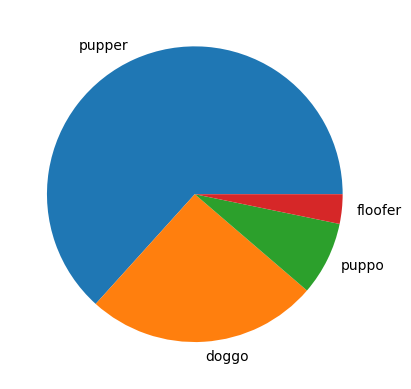

In [309]:
plt.pie(dog_stages_values, labels=dog_stages_labels)

plt.show()

In [315]:
retw=df.groupby('breed')['retweet_count'].mean().sort_values(ascending=False)[:5]

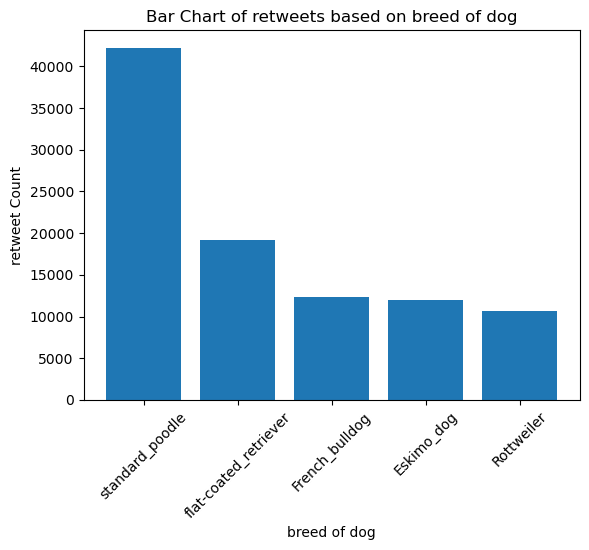

In [324]:
# Create bar chart
plt.bar(retw.index, retw.values)

plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('breed of dog')
plt.ylabel('retweet Count')
plt.title('Bar Chart of retweets based on breed of dog')

# Show chart
plt.show()

In [326]:
fav=df.groupby('breed')['favorite_count'].mean().sort_values(ascending=False)[:5]

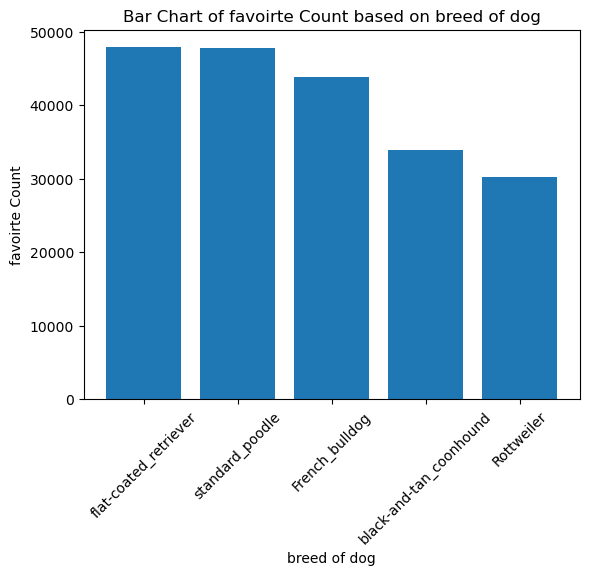

In [327]:
# Create bar chart
plt.bar(fav.index, fav.values)

plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('breed of dog')
plt.ylabel('favoirte Count')
plt.title('Bar Chart of favoirte Count based on breed of dog')

# Show chart
plt.show()